In [528]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [529]:
wine = pd.read_csv('winequality-red.csv',sep=';', parse_dates=True)

In [530]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [531]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [532]:
wine = wine.drop_duplicates()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [533]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [534]:
wine['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [535]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<ipython-input-536-c4e069fabe38>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-536-c4e069fabe38>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-536-c4e069fabe38>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-536-c4e069fabe38>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-536-c4e069fabe38>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-536-c4e069fabe38>:7: UserWarning: Matplotlib 

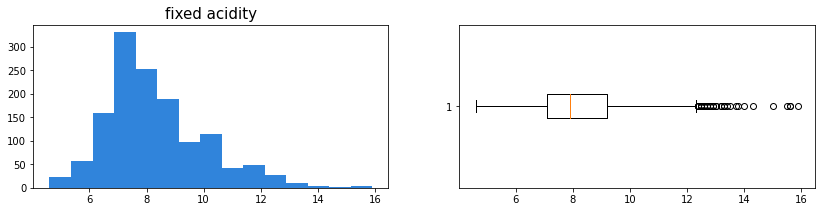

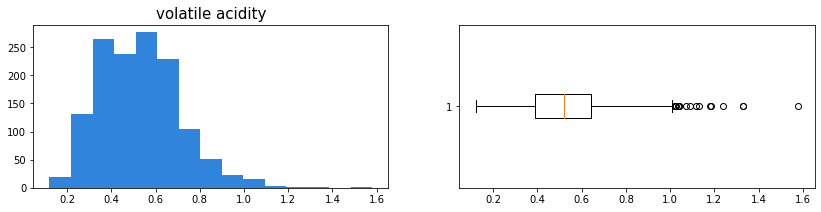

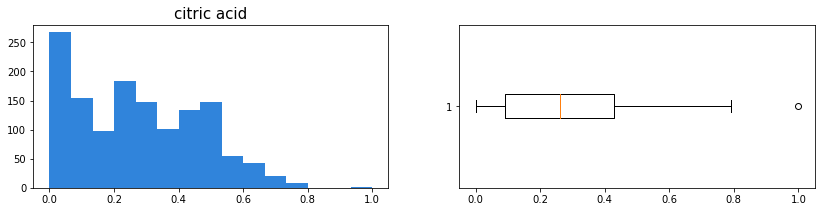

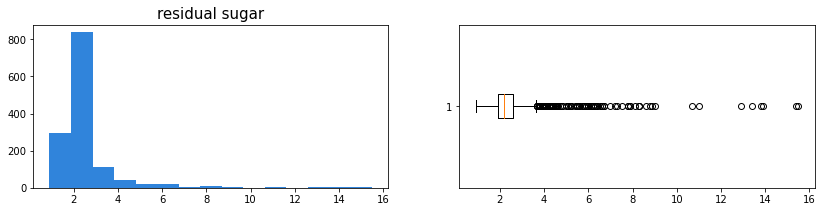

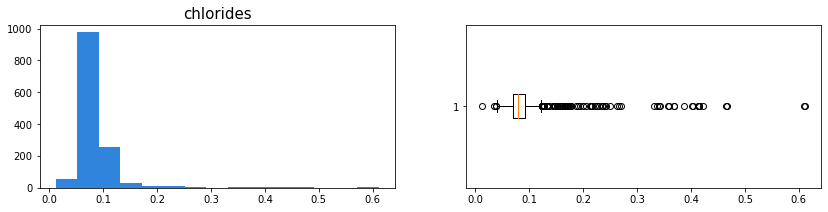

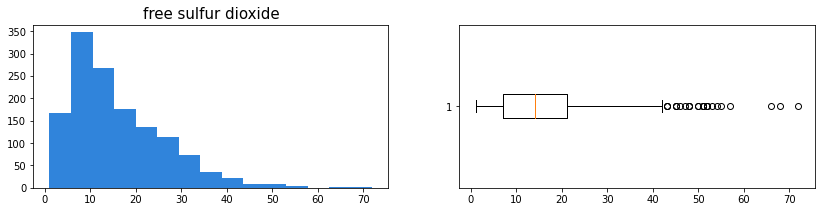

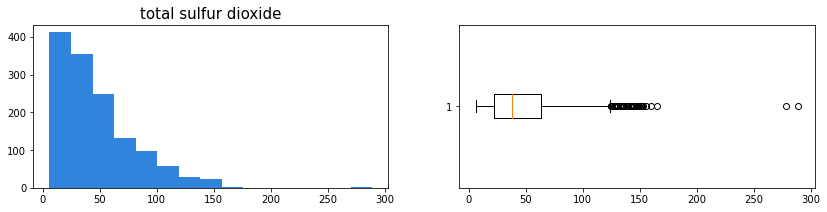

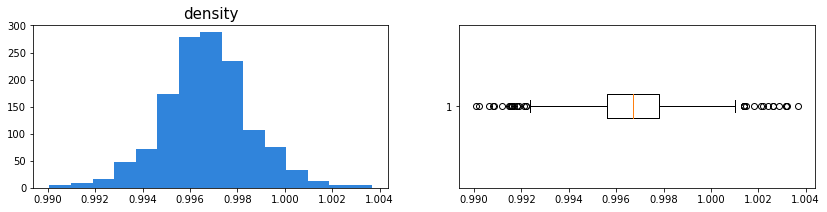

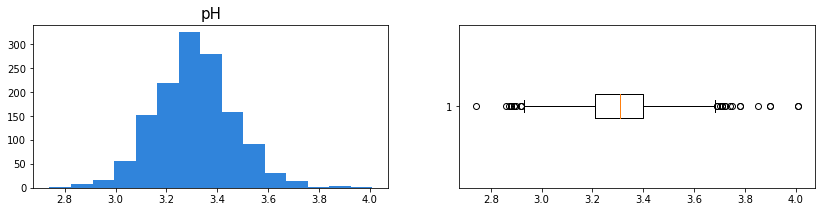

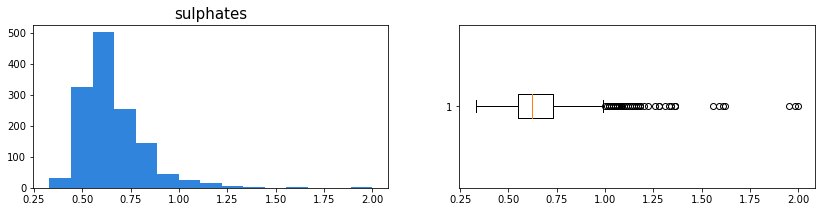

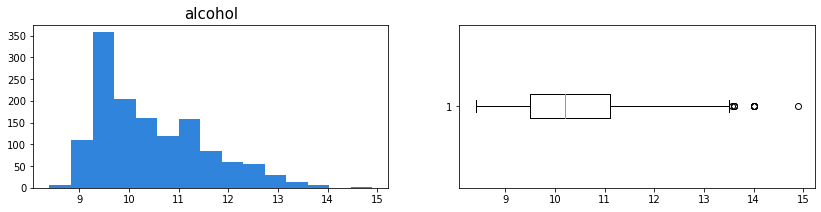

In [536]:
def get_distribution(datas):
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 3))
    axs[0].hist(wine[datas], bins=15, histtype='bar', orientation='vertical', color='#3084DB')
    axs[0].set_title(datas, fontsize=15)
    axs[1].boxplot(wine[datas], vert=False)
    fig.show()
    
data_list = wine.columns.to_list()
data_list.remove('quality')

for i in data_list:
    get_distribution(i)

Можно заметить, что кроме признаков кислотности или связанных с ней, остальные смещены влево. Почти в кадой категории большое количесвто выбросов. Кроме того, признаки имеют разную размерность, поэтому их необходимо скалировать.

<AxesSubplot:>

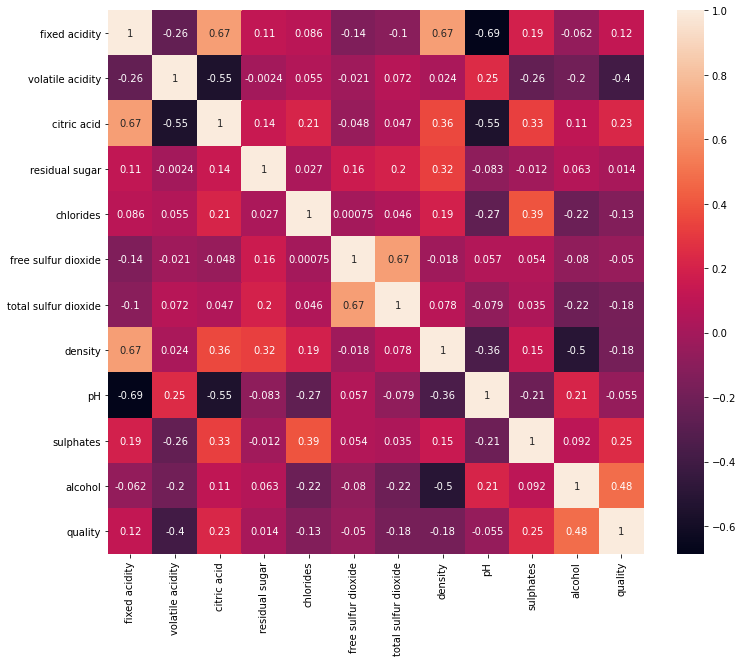

In [537]:
plt.figure(figsize=(12,10))
sns.heatmap(wine.corr(),annot=True)

Мы видим, что ярко выраженной корреляции между признаками и качеством вина не наблюдается. Наиболее сильная положительная корреляция c целевой переменной у alcohol, citric acid и sulphates, отрицательная у volatile acidity.
Высокая корреляция между fixed acidity и citric acid (так как лимонная кислота является нелетучей(фиксированной) кислотой), ph и fixed acidity (так как ph это мера кислот в растворе), total sulfur dioxide и free sulfur dioxide. Остаточный сахар, кислотность и алкоголь имеют средний показатель корреляции с плотностью, вероятно из-за того, что концентрация кислот и сахара делает вино более плотным, а концентрация спирта - менее плотным.


In [538]:
#Target categorization
wine['quality'] = wine['quality'].apply(lambda x: 'bad wine' if x<6.5 else 'good wine')
wine['quality'].value_counts()

bad wine     1175
good wine     184
Name: quality, dtype: int64

## Features Engineering

In [539]:
#Посмотрим отношение суммы кислотности, сахара и алкоголя к плотности
wine['new_feature']=(wine['fixed acidity']+wine['volatile acidity']+wine['residual sugar']+
                wine['pH']+wine['alcohol'])/wine['density']

In [540]:
wine['quality'] = wine['quality'].apply(lambda x: 1 if x=='good wine' else 0)
wine['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

<AxesSubplot:>

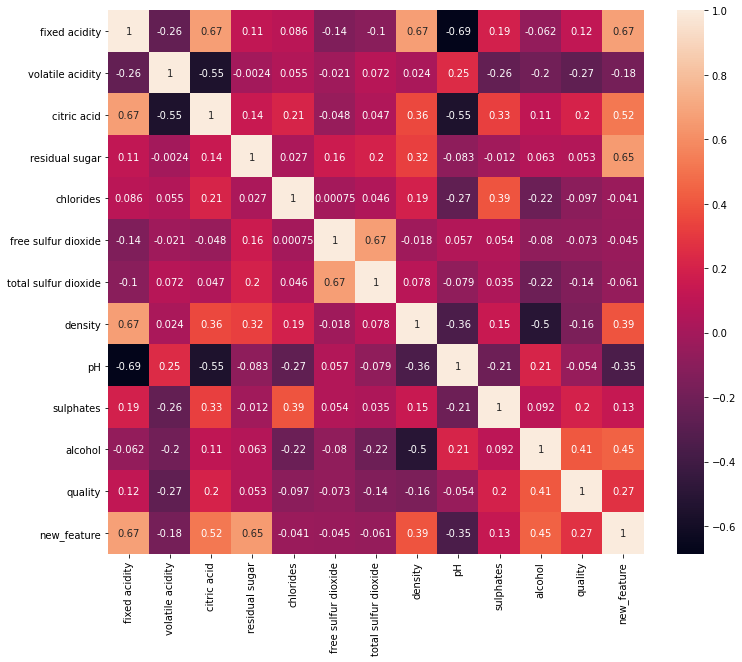

In [541]:
plt.figure(figsize=(12,10))
sns.heatmap(wine.corr(),annot=True)

Удалим те признаки, которые имеют сильную корреляцию с другим и слабую с целевым признаком:ph, free sulfur dioxide, density

In [542]:
wine=wine.drop(columns=['pH', 'free sulfur dioxide', 'density'], axis=1)

Новые признаки предполагается создавать при помощи кластеризации 

In [543]:
#Features clusterisation
clusterer = KMeans(9)

#Main features
features = wine[['quality', 'volatile acidity', 'alcohol', 'sulphates', 'citric acid']]
clusterer.fit(features)
wine['quality_cluster'] = clusterer.predict(features)

#Weak features 
features = wine[['quality', 'fixed acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide',]]
clusterer.fit(features)
wine['weak_cluster'] = clusterer.predict(features)

#Acid features 
features = wine[['quality', 'fixed acidity', 'citric acid', 'volatile acidity']]
clusterer.fit(features)
wine['acidity_cluster'] = clusterer.predict(features)

<AxesSubplot:>

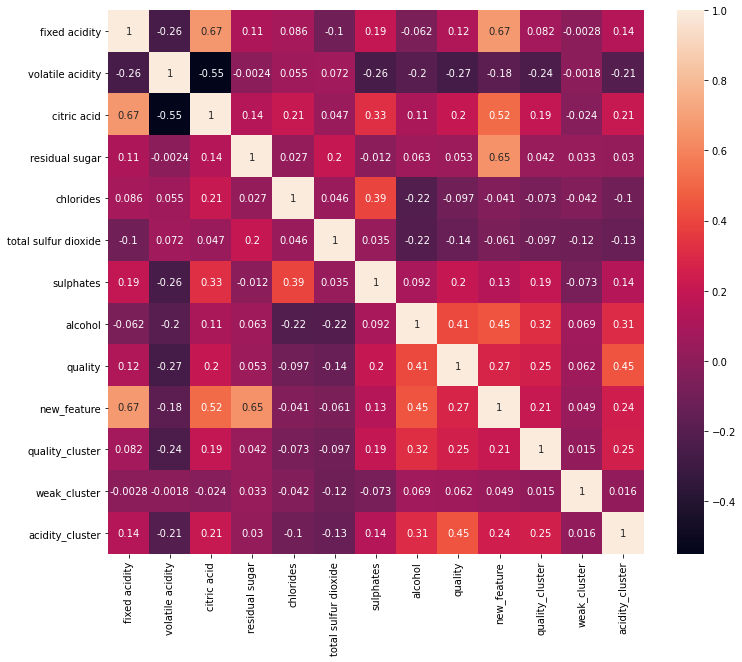

In [544]:
plt.figure(figsize=(12,10))
sns.heatmap(wine.corr(),annot=True)

Как можно заметить некоторые из признаков показывают хороший рещультат. У нас всё равно нет признаков с сильной корреляцией поэтому, удалим только совсем слабые признаки: residual sugar, chlorides. А также fixed acidity, так как у него весомая корреляция с citric acid при низкой корреляция с целевым признаком

In [545]:
wine=wine.drop(columns=['residual sugar', 'chlorides', 'fixed acidity'], axis=1)

## Train&Test splitting

In [546]:
#Поскольку в дальнейшем будет использовать кросс-валидация, 
#в качестве Train будут взяты все признаки (test_size=0).
X = wine.drop(columns=['quality'], axis=1)
y = wine['quality']
print(X.shape)
print(y.shape)

(1359, 9)
(1359,)


## Scaling

In [547]:
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)

# Model

Подбор параметров при помощи GridSearchCV

In [548]:
model = SVC()

#Grid

parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 10, 1000],
              'gamma': [0.01, 0.1, 1, 5, 10]}

grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)

grid.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END .............C=0.001, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ...............C=0.001, gamma=0.01, kernel=poly; total time=   0.0s
[CV 2/5] END ...............C=0.001, gamma=0.01, kernel=poly; total time=   0.0s
[CV 3/5] END ...............C=0.001, gamma=0.01, kernel=poly; total time=   0.0s
[CV 4/5] END ...............C=0.001, gamma=0.01, kernel=poly; total time=   0.0s
[CV 5/5] END ...............C=0.001, gamma=0.01, kernel=poly; total time=   0.0s
[CV 1/5] END ................C=0.001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=0.001, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 10, 1000],
                         'gamma': [0.01, 0.1, 1, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [549]:
best_parameters = grid.best_params_
print(best_parameters)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [550]:
#Best param initialisation
model = SVC(kernel = 'rbf',
            random_state=42,
            gamma = 0.1,
            C = 10)

#Cross-fold validation
all_accuracies = cross_val_score(estimator=model, X=X, y=y, cv=5)

# Metric

In [551]:
print(all_accuracies)

[0.90808824 0.90441176 0.97058824 0.92647059 0.88929889]


In [552]:
print(all_accuracies.mean())

0.9197715433036684


In [553]:
print(all_accuracies.std())

0.028029335667016816


## Вывод:
Средний показатель метрики accuracy = 91.98%,

стандартное отклонение = 2.8%

Данные показатели позволяют оценить качество работы модели как удовлетворительное. 